# Código hecho por Fernando Caneo Mercado

In [67]:
#Importación de las librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [982]:
#Lectura de datos

accounts = pd.read_csv('accounts_profile.csv')
financial = pd.read_csv('financial_profile.csv')
payment = pd.read_csv('payment_offer.csv')
quotation = pd.read_csv('quotation_activity.csv')


## Visión general de los datos

In [971]:
accounts.head()

,id,birthday,gender,country_id,date_joined,last_login,gender_nan,country_id_nan
0,3073478,1985-04-27,f,1.0,2018-10-06 20:48:00,2018-10-06 23:48:01,0,0
1,3073481,NaN,NaN,2.0,2018-10-06 20:55:08,2018-10-07 11:57:43,1,0
2,3073484,1983-01-06,m,1.0,2018-10-06 20:55:20,2018-10-06 23:56:43,0,0
3,3073487,1991-09-07,m,1.0,2018-10-06 20:58:03,2018-10-06 23:58:03,0,0
4,3073490,1990-05-23,f,1.0,2018-10-06 21:03:19,2018-10-07 00:04:58,0,0


In [842]:
financial.tail(20)


,user_id,salary,seniority,employment_status,has_checking_account,entry
175495,3872846,NaN,-1,NaN,0,0
175496,3872852,NaN,-1,NaN,0,0
175497,3872855,5.0,1,employed,1,750000
175498,3872858,NaN,-1,NaN,0,0
175499,3872861,NaN,-1,NaN,0,0
175500,3872867,4.0,1,employed,1,400000
175501,3872870,NaN,-1,NaN,0,0
175502,3872873,NaN,-1,NaN,0,0
175503,3872876,NaN,-1,NaN,0,0
175504,3872885,NaN,-1,NaN,0,0


In [561]:
payment.head()


,user_id,product,created
0,492230,total_payment,2018-10-06 22:24:59.961338
1,3073430,total_payment,2018-10-06 23:20:09.566285
2,2064071,total_payment,2018-10-06 23:35:40.316639
3,733463,total_payment,2018-10-06 23:49:11.094730
4,3073466,total_payment,2018-10-06 23:55:52.110638


In [12]:
quotation.head()

,user_id,product,created
0,568997,99,2018-10-06 21:03:08
1,2457644,31,2018-10-06 21:03:47
2,3071309,107,2018-10-06 21:12:13
3,3059822,116,2018-10-06 21:28:28
4,3059822,115,2018-10-06 21:32:27


# Pregunta 1


## Depuracion de datos

In [34]:
#Considerando que las solicitudes de crédito y los pagos de deudas se consideran transacciones
#Se unen para hacer una tabla de transacciones

transacciones = pd.concat([payment,quotation])
transacciones.shape

(48133, 3)

In [383]:
#Se realiza un inner join entre transacciones y los usuarios para calcular cúantos días han pasado
#entre la transacción y la creación de la cuenta

trans_acc = pd.merge(transacciones, accounts, left_on= 'user_id', right_on='id')
trans_acc.shape

(20231, 9)

**Observación** : Al hacer el join los datos disminuyen en cantidad, lo que es normal pues el corte que se les hizo a todos fue para un mismo instante de tiempo, por tanto hay transacciones de usuarios que son desconocidos para esta base de datos ya que se crearon con anterioridad al corte.

In [384]:
trans_acc.head()

,user_id,product,created,id,birthday,gender,country_id,date_joined,last_login
0,3073847,total_payment,2018-10-07 10:42:03.487499,3073847,1996-03-13,m,1.0,2018-10-07 07:34:41,2018-10-07 10:34:42
1,3074936,total_payment,2018-10-07 20:46:34.488778,3074936,1982-02-16,f,1.0,2018-10-07 17:28:31,2019-01-29 13:56:39
2,3074936,99,2018-10-07 20:42:17,3074936,1982-02-16,f,1.0,2018-10-07 17:28:31,2019-01-29 13:56:39
3,3076049,total_payment,2018-10-08 16:47:49.824659,3076049,1996-10-25,f,1.0,2018-10-08 13:30:49,2018-10-08 16:30:49
4,3076370,total_payment,2018-10-08 20:35:31.764826,3076370,1991-06-27,f,1.0,2018-10-08 17:25:30,2019-01-29 17:26:00


In [385]:
#Se limpian las columnas que no se usarán del DataFrame (para un análisis preliminar)
trans_acc = trans_acc[['user_id', 'product', 'created', 'date_joined']]

#Se calculan los días transcurridos entre la creación de la cuenta y la transacción
trans_acc['dias_trans'] = ((pd.to_datetime(trans_acc['created'])-pd.to_datetime(trans_acc['date_joined'])).dt.days)

#Se vuelve a limpiar la data
trans_acc = trans_acc[['user_id', 'dias_trans', 'product']]

trans_acc.head()

    

,user_id,dias_trans,product
0,3073847,0,total_payment
1,3074936,0,total_payment
2,3074936,0,99
3,3076049,0,total_payment
4,3076370,0,total_payment


## Caso con todos los datos

In [525]:
#Se crea la columna por usuario con la cantidad de transacciones que hizo el mismo día que creo la cuenta.
igual0 = pd.DataFrame(trans_acc[trans_acc['dias_trans'] == 0].groupby(['user_id']).count()['dias_trans'])

#Se crea la columna por usuario con la cantidad de transacciones que hizo un día o más desde que creo la cuenta.
mayor0 = pd.DataFrame(trans_acc[trans_acc['dias_trans'] > 0].groupby(['user_id']).count()['dias_trans'])

#Se hace el full outer join de ambas y donde haya NaN se entiende que hubo 0 transacciones.
conteo = pd.merge(igual0, mayor0, how = 'outer', left_index = True, right_index=True).fillna(0)
conteo = conteo.rename(columns = {'dias_trans_x': 'igual0', 'dias_trans_y': 'mayor0'})

#Se crea una columna que indique quien domina por usuario (new, returning, same )
conteo.loc[conteo['igual0'] > conteo['mayor0'], 'tipo_usuario'] = 'nuevo'
conteo.loc[conteo['igual0'] < conteo['mayor0'], 'tipo_usuario'] = 'returning'
conteo.loc[conteo['igual0'] == conteo['mayor0'], 'tipo_usuario'] = 'same'

#Se convierte a DataFrame y se cambia el nombre
resumen = pd.DataFrame(conteo.groupby(['tipo_usuario']).count()['igual0'])
resumen.rename(columns = {'igual0':'sin_rest'}, inplace = True)
resumen





,sin_rest
tipo_usuario,
nuevo,11895
returning,3594
same,466


## Caso con usuarios de mayor tráfico (N transacciones)

In [526]:
for i in range(2,7):

    #Se crea la columna por usuario con la cantidad de transacciones que hizo el mismo día que creo la cuenta.
    igual0 = pd.DataFrame(trans_acc[trans_acc['dias_trans'] == 0].groupby(['user_id']).count()['dias_trans'])

    #Se crea la columna por usuario con la cantidad de transacciones que hizo un día o más desde que creo la cuenta.
    mayor0 = pd.DataFrame(trans_acc[trans_acc['dias_trans'] > 0].groupby(['user_id']).count()['dias_trans'])

    #Se hace el full outer join de ambas y donde haya NaN se entiende que hubo 0 transacciones.
    conteo = pd.merge(igual0, mayor0, how = 'outer', left_index = True, right_index=True).fillna(0)
    conteo = conteo.rename(columns = {'dias_trans_x': 'igual0', 'dias_trans_y': 'mayor0'})

    #Se limita a usuarios que tengan 2 o más transacciones:
    conteo = conteo[(conteo['igual0']+conteo['mayor0'])>=i]

    #Se crea una columna que indique quien domina por usuario (new, returning, same )
    conteo.loc[conteo['igual0'] > conteo['mayor0'], 'tipo_usuario'] = 'nuevo'
    conteo.loc[conteo['igual0'] < conteo['mayor0'], 'tipo_usuario'] = 'returning'
    conteo.loc[conteo['igual0'] == conteo['mayor0'], 'tipo_usuario'] = 'same'

    #Se convierte a DataFrame y se cambia el nombre
    a = pd.DataFrame(conteo.groupby(['tipo_usuario']).count()['igual0'])
    a.rename(columns = {'igual0':str(i)+' trans_min'}, inplace = True)
    resumen = pd.concat([resumen, a], axis=1)
resumen

,sin_rest,2 trans_min,3 trans_min,4 trans_min,5 trans_min,6 trans_min
tipo_usuario,,,,,,
nuevo,11895,1927,342,76,23,3
returning,3594,876,334,100,39,18
same,466,466,22,22,3,3


Text(0.5, 1.0, 'Logaritmo de usuarios por tipo v/s sus transacciones')

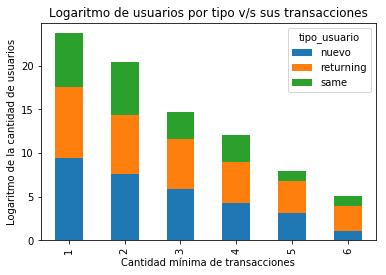

In [569]:
resumen.columns=[1,2,3,4,5,6]
np.log(resumen).T.plot(kind='bar', stacked=True)
plt.ylabel('Logaritmo de la cantidad de usuarios')
plt.xlabel('Cantidad mínima de transacciones')
plt.title('Logaritmo de usuarios por tipo v/s sus transacciones')

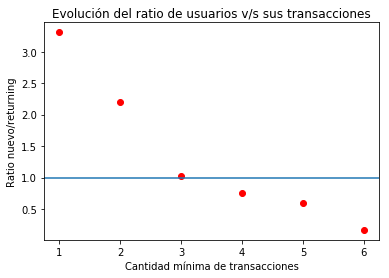

In [572]:
#Creación de ratio usuarios nuevos v/s usuarios que retornan y gráfico

aux=resumen.T
aux['nuevo/returning'] = resumen.T['nuevo']/resumen.T['returning']
resumen= aux.T
resumen.columns=[1,2,3,4,5,6]
plt.plot(resumen.loc['nuevo/returning'], 'ro')
plt.ylabel('Ratio nuevo/returning')
plt.xlabel('Cantidad mínima de transacciones')
plt.title('Evolución del ratio de usuarios v/s sus transacciones')
plt.axhline(y=1)

count    20231.000000
mean         7.919777
std         19.388913
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        121.000000
Name: dias_trans, dtype: float64

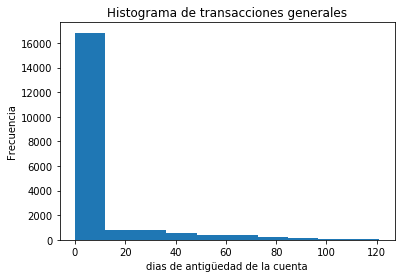

In [502]:
plt.hist(trans_acc['dias_trans'])
plt.ylabel('Frecuencia')
plt.xlabel('dias de antigüedad de la cuenta')
plt.title('Histograma de transacciones generales' )
trans_acc['dias_trans'].describe()

count    5420.000000
mean       29.561808
std        27.631710
min         1.000000
25%         6.000000
50%        21.000000
75%        47.000000
max       121.000000
Name: dias_trans, dtype: float64

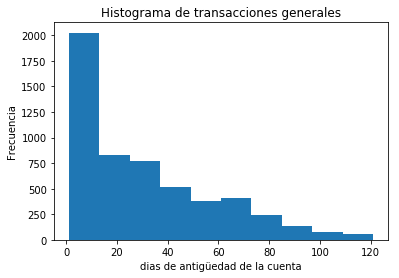

In [503]:
plt.hist(trans_acc[trans_acc['dias_trans']>=1]['dias_trans'])
plt.ylabel('Frecuencia')
plt.xlabel('dias de antigüedad de la cuenta')
plt.title('Histograma de transacciones generales' )
trans_acc[trans_acc['dias_trans']>=1]['dias_trans'].describe()

# Pregunta 2
## Trabajo con los datos

In [983]:
# Se rescata el join de transacciones:

#Se crea la columna por usuario con la cantidad de transacciones que hizo el mismo día que creo la cuenta.
igual0 = pd.DataFrame(trans_acc[trans_acc['dias_trans'] == 0].groupby(['user_id']).count()['dias_trans'])

#Se crea la columna por usuario con la cantidad de transacciones que hizo un día o más desde que creo la cuenta.
mayor0 = pd.DataFrame(trans_acc[trans_acc['dias_trans'] > 0].groupby(['user_id']).count()['dias_trans'])

#Se hace el full outer join de ambas y donde haya NaN se entiende que hubo 0 transacciones.
conteo = pd.merge(igual0, mayor0, how = 'outer', left_index = True, right_index=True).fillna(0)

conteo.head()

,dias_trans_x,dias_trans_y
user_id,,
3073529,1.0,0.0
3073586,1.0,0.0
3073595,1.0,0.0
3073604,1.0,0.0
3073658,1.0,0.0


In [984]:
#Se hace un Left join para ver qué cliente tranza y cuál no desde la base de datos madre (accounts)
trans = pd.merge(accounts, conteo, how='left', left_on='id', right_index=True)

#Se calcula la cantidad de transacciones
trans['transacciones'] = trans['dias_trans_x'] + trans['dias_trans_y']

#Limpieza 1 de columnas
trans = trans.drop(['date_joined', 'last_login', 'dias_trans_x', 'dias_trans_y'], axis=1)
trans['transacciones'] = trans['transacciones'].fillna(0)
trans.head()




,id,birthday,gender,country_id,transacciones
0,3073478,1985-04-27,f,1.0,0.0
1,3073481,NaN,NaN,2.0,0.0
2,3073484,1983-01-06,m,1.0,0.0
3,3073487,1991-09-07,m,1.0,0.0
4,3073490,1990-05-23,f,1.0,0.0


## Supuesto: 
### Si bien hay clientes que no han llenado el financial profile, asumiré que estos aparecen con NaN en esa tabla y no que no aparecen en ella, esto con el objetivo de hacer un inner join entre esta tabla y la trans para obtener más datos sobre los clientes.

In [985]:
#Inner join con la tabla financial.
trans_1 = pd.merge(trans, financial, left_on='id', right_on='user_id')

#Se eliminan todos los id que tengan algún NaN
trans_1 = trans_1.dropna()
trans_1.head()

,id,birthday,gender,country_id,transacciones,user_id,salary,seniority,employment_status,has_checking_account,entry
4,3073499,1992-08-16,f,2.0,0.0,3073499,4.0,2,employer,1,12000
8,3073514,1993-01-11,f,1.0,0.0,3073514,3.0,2,employed,1,255000
12,3073526,1970-12-10,m,1.0,0.0,3073526,6.0,5,employed,1,1450000
13,3073529,1992-09-12,m,2.0,1.0,3073529,3.0,5,employed,1,9000
15,3073535,1997-06-28,f,1.0,0.0,3073535,4.0,1,employed,0,390000


In [986]:
#Inner join con la tabla financial.
trans_1 = pd.merge(trans, financial, left_on='id', right_on='user_id')

#Se elimina user_id porque ya estaba repetida y has_checking_account, salary y seniority por sospecha de multicolinealidad.
#Además se eliminan los usuarios que no pusieron fecha de nacimiento
trans_1 = trans_1.drop(['user_id', 'has_checking_account', 'salary', 'seniority'], axis=1) 
trans_1 = trans_1.drop(trans_1[trans_1['birthday'].isnull()].index, axis=0)

#Se crean variables binarias respecto a las distintas categorias, mediante una función:

def createDummies(df, column_name):
    dummy = pd.get_dummies(df[column_name], prefix=column_name)
    df = df.drop([column_name], axis=1)
    df = pd.concat([df, dummy], axis=1)
    return df



In [987]:
#Se crean las variables binarias
trans_1['trabaja'] = np.where((trans_1['employment_status'] == 'employer') |
                              (trans_1['employment_status'] == 'employed') |
                              (trans_1['employment_status'] == 'independent'),1,0)
trans_1 = trans_1.drop(['employment_status'], axis=1)

trans_1 = createDummies(trans_1, 'gender')

#Se crea manualmente la variable binaria si transó (al menos una vez)
trans_1['transacciones'] = np.where(trans_1['transacciones']>=1, 1, 0)
trans_1.head()

,id,birthday,country_id,transacciones,entry,trabaja,gender_f,gender_m
0,3073478,1985-04-27,1.0,0,0,0,1,0
1,3073487,1991-09-07,1.0,0,0,0,0,1
2,3073490,1990-05-23,1.0,0,0,0,1,0
3,3073496,1991-10-09,1.0,0,0,0,1,0
4,3073499,1992-08-16,2.0,0,12000,1,1,0


In [988]:
#Se convierte el cumpleaños en edad: (se elimina una fecha)
trans_1 = trans_1.drop(69841)
trans_1['edad'] = (((pd.to_datetime('today')- pd.to_datetime(trans_1['birthday']))).dt.days)/365

#Se rescatan las columnas para corroborar que se creó bien la función
trans_1.columns.values

array(['id', 'birthday', 'country_id', 'transacciones', 'entry',
       'trabaja', 'gender_f', 'gender_m', 'edad'], dtype=object)

In [989]:
#Se crea la data para la regresión

Y = trans_1['transacciones']
X = trans_1[['country_id', 'entry',
       'trabaja', 'gender_f', 'gender_m', 'edad']]

In [990]:
import statsmodels.formula.api as sm
logit_model = sm.Logit(Y, X)

In [991]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.216486
         Iterations 8


In [992]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.291     
Dependent Variable: transacciones    AIC:              75481.1257
Date:               2019-02-14 15:36 BIC:              75541.5371
No. Observations:   174305           Log-Likelihood:   -37735.   
Df Model:           5                LL-Null:          -53219.   
Df Residuals:       174299           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
country_id    0.6382    0.0198   32.1668  0.0000   0.5993   0.6771
entry         0.0000    0.0000    0.6939  0.4877  -0.0000   0.0000
trabaja       3.3055    0.0288  114.5974  0.0000   3.2490   3.3621
gender_f     -4.7048    0.0577  -81.5343  0.0000  -4.8179  -4.5917
gender_m     -4.6689    0.0579  -80.6365  0.0000  -4.7824  -4.5555
edad         -0.0194    0.0012  -16.0966  0.0000  -0.0217  -0.0170
=================================================================

"""

## Análisis considerando suficiencia de datos (NaN) v/s transacción

In [959]:
#Lectura de datos

accounts = pd.read_csv('accounts_profile.csv')
financial = pd.read_csv('financial_profile.csv')
payment = pd.read_csv('payment_offer.csv')
quotation = pd.read_csv('quotation_activity.csv')

In [972]:
## Genero condicionales de suficiencia de datos

financial['entry_nan'] = np.where(financial['entry'] == 0,1,0)
financial['employment_status_nan'] = np.where(financial['employment_status'].isnull(),1,0)

#OJO: No coloco birthday porque coincide con gender
accounts['gender_nan'] =  np.where(accounts['gender'].isnull(),1,0)
accounts['country_id_nan'] =  np.where(accounts['country_id'].isnull(),1,0)

#Se hace un Left join para ver qué cliente tranza y cuál no desde la base de datos madre (accounts)
trans = pd.merge(accounts, conteo, how='left', left_on='id', right_index=True)

#Se calcula la cantidad de transacciones
trans['transacciones'] = trans['dias_trans_x'] + trans['dias_trans_y']

#Limpieza 1 de columnas
trans = trans.drop(['date_joined', 'last_login', 'dias_trans_x', 'dias_trans_y'], axis=1)
trans['transacciones'] = trans['transacciones'].fillna(0)

#Inner join con la tabla financial.
trans_1 = pd.merge(trans, financial, left_on='id', right_on='user_id')

trans_1['transacciones'] = np.where(trans_1['transacciones']>=1, 1, 0)

#Ojo que elimino country_id porque genera multicolinealidad ya que no tiene 1 después de hacer el join.
trans_1 = trans_1.drop(['birthday', 'gender', 'country_id', 'user_id', 'salary', 'seniority', 'employment_status', 'has_checking_account', 'entry' ], axis=1)
trans_1.tail(10)

,id,gender_nan,country_id_nan,transacciones,entry_nan,employment_status_nan
175502,3872873,0,0,0,1,1
175503,3872876,0,0,0,1,1
175504,3872885,0,0,0,1,1
175505,3872888,0,0,0,1,1
175506,3872891,0,0,0,1,1
175507,3872906,1,0,0,1,1
175508,3872909,1,0,0,0,0
175509,3872918,1,0,0,1,1
175510,3872921,1,0,0,1,1
175511,3872927,1,0,0,1,1


In [973]:
trans_1['country_id_nan'].unique()

array([0], dtype=int64)

In [974]:
trans_1.columns.values

array(['id', 'gender_nan', 'country_id_nan', 'transacciones', 'entry_nan',
       'employment_status_nan'], dtype=object)

In [975]:
#Se crea la data para la regresión

Y = trans_1['transacciones']
X = trans_1[['gender_nan', 'entry_nan', 'employment_status_nan']]

In [976]:
import statsmodels.formula.api as sm
logit_model = sm.Logit(Y, X)

In [977]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.241161
         Iterations 9


In [978]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.208     
Dependent Variable:    transacciones     AIC:               84659.1863
Date:                  2019-02-14 15:33  BIC:               84689.4127
No. Observations:      175512            Log-Likelihood:    -42327.   
Df Model:              2                 LL-Null:           -53466.   
Df Residuals:          175509            LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
gender_nan            -1.4267   0.1471  -9.6977 0.0000 -1.7151 -1.1384
entry_nan             -1.9392   0.1064 -18.2226 0.0000 -2.1478 -1.7306
employment_status_nan -3.2648   0.1134 -28.7796 0.0000 -3.4872 -3.0425
======================================================================

"""